In [84]:
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps

counter = 0
color = 0

# loop over all the files in the folder
for filename in os.listdir("UTKFace_trainGLASSES"):  
    counter += 1
    # open the image file and convert it to a NumPy array
    if (filename == ".DS_Store"):
        continue
    with Image.open(os.path.join("UTKFace_trainGLASSES", filename)) as img:  
        bw_img = img.convert('L').convert("RGB")
        bw_img.save(f'UTKFace_trainBWGLASSES/{filename}bw.jpg')
        img.save(f'UTKFace_trainBWGLASSES/{filename}.jpg')
        
        # if counter % 5 == 0:
            # bw_img = img.convert('L')
#             if color == 0:
#                 bw_img = bw_img.convert("RGB")
#                 bw_img.save(f'UTKFace_trainCOLOR/{filename}bw.jpg')
#                 color += 1
#             elif color == 1:
#                 red_image = ImageOps.colorize(bw_img, black="black", white="red").convert("RGB")
#                 red_image.save(f'UTKFace_trainCOLOR/{filename}r.jpg')
#                 color += 1
                
#             elif color == 2:
#                 green_image = ImageOps.colorize(bw_img, black="black", white="green").convert("RGB")
#                 green_image.save(f'UTKFace_trainCOLOR/{filename}g.jpg')
#                 color += 1
#             else:
#                 blue_image = ImageOps.colorize(bw_img, black="black", white="blue").convert("RGB")
#                 blue_image.save(f'UTKFace_trainCOLOR/{filename}b.jpg')
#                 color = 0


In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
img = cv2.imread('UTKFace_one/img.jpg')

# Define the distortion parameters
K = np.array([[224, 0, 224], [0, 224, 224], [0, 0, 1]]) # Intrinsic camera matrix
D = np.array([0.1, 0.1, 0.1, 0, 0]) # Distortion coefficients

# Undistort the image
img_undistorted = cv2.undistort(img, K, D)

# Re-distort the image (optional)
# img_redistorted = cv2.undistort(img_undistorted, K, D)

# Display the original, undistorted, and re-distorted images
# plt.imshow(img)
plt.imshow(img_undistorted)
img_undistorted.save("new_img.jpg")

AttributeError: 'numpy.ndarray' object has no attribute 'save'

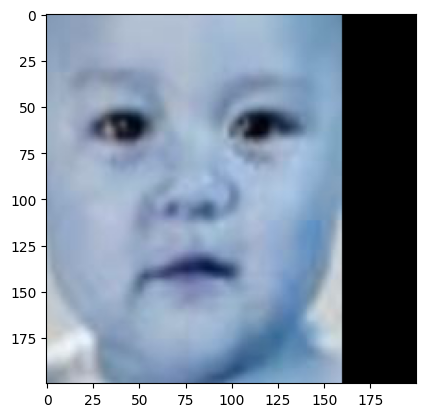

In [82]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("UTKFace_one/img.jpg")

# Define the source and destination quadrilaterals
src_quad = np.array([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]], dtype=np.float32)
dst_quad = np.array([[0, 0], [img.shape[1]*0.8, 0], [0.8*img.shape[1], img.shape[0]], [0*img.shape[1], img.shape[0]]], dtype=np.float32)

# Compute the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_quad, dst_quad)

# Apply the perspective transformation to the image
warped_img = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

# Display the result
plt.imshow(warped_img)
plt.show()